<a href="https://colab.research.google.com/github/RM-RAMASAMY/CMPE-255/blob/main/Assignment_3_Pycaret/Binary_Classification_With_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets &>/dev/null
!pip install pycaret[full] &>/dev/null

import opendatasets as od
import pandas

In [ ]:
od.download(	"https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rmramasamy
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset


100%|██████████| 602k/602k [00:00<00:00, 77.8MB/s]

In [ ]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
my_df = pandas.read_csv('/content/mushroom-dataset/mushroom_cleaned.csv')

In [ ]:
my_df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
set(my_df['class'])

{0, 1}

A typical workflow in PyCaret consist of following 5 steps in this order:

## **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(my_df, target = 'class', session_id = 123)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Original data shape,"(54035, 9)"
4,Transformed data shape,"(54035, 9)"
5,Transformed train set shape,"(37824, 9)"
6,Transformed test set shape,"(16211, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [ ]:
# init setup on exp
exp.setup(my_df, target = 'class', session_id = 123)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Original data shape,"(54035, 9)"
4,Transformed data shape,"(54035, 9)"
5,Transformed train set shape,"(37824, 9)"
6,Transformed test set shape,"(16211, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9907,0.9992,0.9917,0.9913,0.9915,0.9812,0.9812,1.5570
rf,Random Forest Classifier,0.9897,0.9991,0.9900,0.9912,0.9906,0.9792,0.9792,2.8010
catboost,CatBoost Classifier,0.9888,0.9993,0.9888,0.9908,0.9898,0.9774,0.9774,12.1390
xgboost,Extreme Gradient Boosting,0.9887,0.9992,0.9889,0.9904,0.9897,0.9771,0.9771,0.3140
lightgbm,Light Gradient Boosting Machine,0.9778,0.9977,0.9769,0.9826,0.9797,0.9552,0.9553,1.3390
dt,Decision Tree Classifier,0.9744,0.9742,0.9767,0.9768,0.9767,0.9484,0.9484,0.2570
gbc,Gradient Boosting Classifier,0.8759,0.9437,0.8831,0.8901,0.8865,0.7495,0.7496,3.1380
ada,Ada Boost Classifier,0.7599,0.8270,0.8029,0.7698,0.7860,0.5128,0.5134,0.8740
knn,K Neighbors Classifier,0.7091,0.7854,0.7379,0.7338,0.7358,0.4121,0.4121,0.2890
qda,Quadratic Discriminant Analysis,0.6553,0.7190,0.7274,0.6720,0.6986,0.2975,0.2988,0.0500


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9907,0.9992,0.9917,0.9913,0.9915,0.9812,0.9812,1.5350
rf,Random Forest Classifier,0.9897,0.9991,0.9900,0.9912,0.9906,0.9792,0.9792,2.8980
catboost,CatBoost Classifier,0.9888,0.9993,0.9888,0.9908,0.9898,0.9774,0.9774,12.1550
xgboost,Extreme Gradient Boosting,0.9887,0.9992,0.9889,0.9904,0.9897,0.9771,0.9771,0.3860
lightgbm,Light Gradient Boosting Machine,0.9778,0.9977,0.9769,0.9826,0.9797,0.9552,0.9553,1.3610
dt,Decision Tree Classifier,0.9744,0.9742,0.9767,0.9768,0.9767,0.9484,0.9484,0.1530
gbc,Gradient Boosting Classifier,0.8759,0.9437,0.8831,0.8901,0.8865,0.7495,0.7496,3.1450
ada,Ada Boost Classifier,0.7599,0.8270,0.8029,0.7698,0.7860,0.5128,0.5134,0.7260
knn,K Neighbors Classifier,0.7091,0.7854,0.7379,0.7338,0.7358,0.4121,0.4121,0.2580
qda,Quadratic Discriminant Analysis,0.6553,0.7190,0.7274,0.6720,0.6986,0.2975,0.2988,0.0470


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

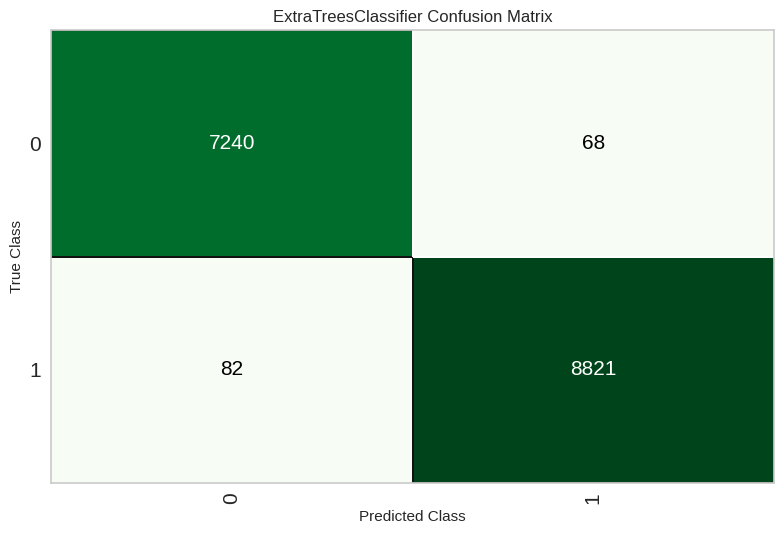

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

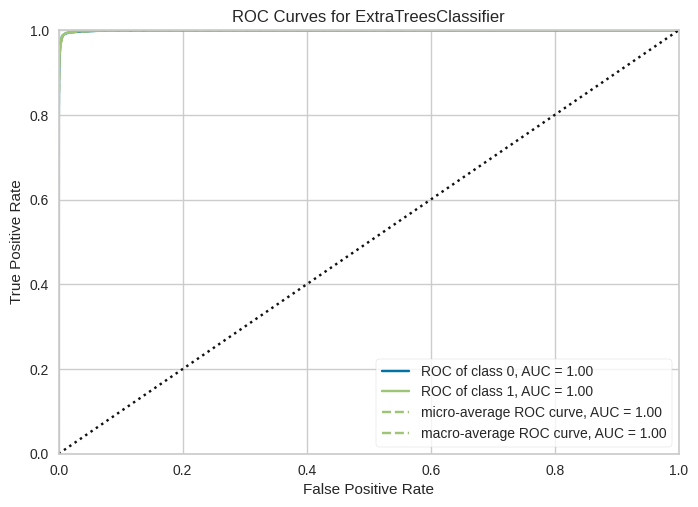

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

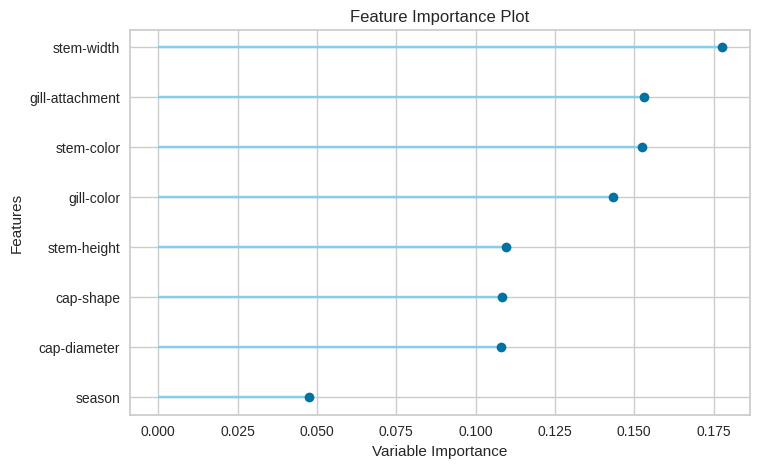

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# check docstring to see available plots
# help(plot_model)

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9907,0.9993,0.9908,0.9924,0.9916,0.9813,0.9813


In [ ]:
# show predictions df
holdout_pred.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class,prediction_label,prediction_score
14747,663,6,5,8,0.079154,1468,6,0.943195,1,1,1.00
19245,512,2,1,0,0.147648,1229,11,1.804273,0,0,0.99
23760,762,6,0,10,0.919572,1202,11,0.888450,0,0,0.61
2603,1539,6,2,10,1.965195,1798,11,0.943195,0,0,0.98
15101,593,0,5,10,0.366493,1036,3,0.888450,0,0,1.00


In [ ]:
# copy data and drop Class variable

new_data = my_df.copy()
new_data.drop('class', axis=1, inplace=True)
new_data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,prediction_label,prediction_score
0,1372,2,2,10,3.807467,1545,11,1.804273,1,1.00
1,1461,2,2,10,3.807467,1557,11,1.804273,1,1.00
2,1371,2,2,10,3.612496,1566,11,1.804273,1,0.86
3,1261,6,2,10,3.787572,1566,11,1.804273,1,0.97
4,1305,6,2,10,3.711971,1464,11,0.943195,1,1.00


In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['cap-diameter', 'cap-shape',
                                              'gill-attachment', 'gill-color',
                                              'stem-height', 'stem-width',
                                              'stem-color', 'season'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean')))...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
   

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['cap-diameter', 'cap-shape',
                                             'gill-attachment', 'gill-color',
                                             'stem-height', 'stem-width',
                                             'stem-color', 'season'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strateg...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=123, verbose=0,
                                      warm_start=False))],
         verbose=False)

In [ ]:
# init setup function
s = setup(my_df, target = 'class', session_id = 123)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Original data shape,"(54035, 9)"
4,Transformed data shape,"(54035, 9)"
5,Transformed train set shape,"(37824, 9)"
6,Transformed test set shape,"(16211, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
# lets access X_train_transformed
get_config('X_train_transformed')

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
41525,366.0,2.0,6.0,5.0,0.044195,286.0,11.0,0.943195
6666,403.0,2.0,6.0,11.0,0.111837,468.0,6.0,0.888450
24662,496.0,6.0,0.0,8.0,0.899677,1211.0,12.0,0.943195
32989,779.0,2.0,5.0,7.0,0.820097,965.0,8.0,1.804273
27936,417.0,5.0,1.0,0.0,0.473925,431.0,1.0,0.943195
...,...,...,...,...,...,...,...,...
32575,801.0,6.0,1.0,10.0,1.015068,903.0,11.0,0.943195
47988,1395.0,5.0,1.0,11.0,0.036237,3460.0,4.0,0.888450
46992,759.0,6.0,4.0,5.0,0.243144,1502.0,6.0,0.888450
24116,1100.0,5.0,0.0,11.0,0.263039,2009.0,11.0,0.943195


In [ ]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [ ]:
# help(setup)

In [ ]:
# init setup with normalize = True

s = setup(my_df, target = 'class', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Original data shape,"(54035, 9)"
4,Transformed data shape,"(54035, 9)"
5,Transformed train set shape,"(37824, 9)"
6,Transformed test set shape,"(16211, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


<Axes: >

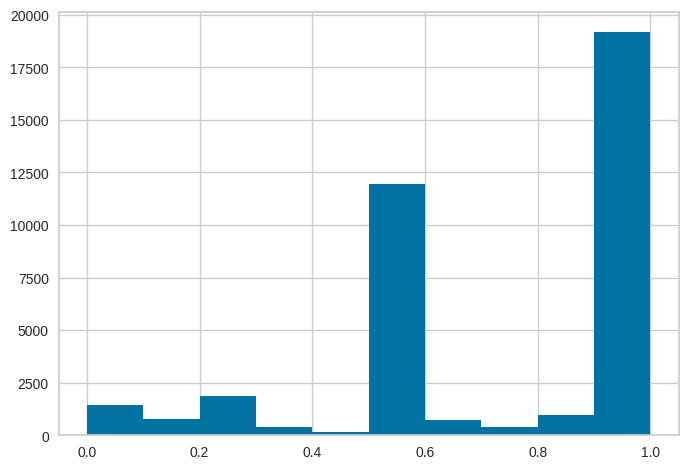

In [ ]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['stem-color'].hist()

<Axes: >

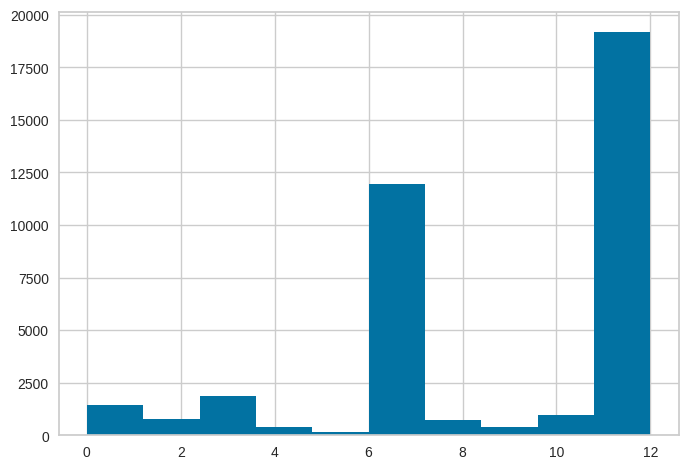

In [ ]:
get_config('X_train')['stem-color'].hist()

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9907,0.9992,0.9917,0.9913,0.9915,0.9812,0.9812,1.5570
rf,Random Forest Classifier,0.9896,0.9991,0.9899,0.9912,0.9906,0.9791,0.9791,2.7340
knn,K Neighbors Classifier,0.9893,0.9971,0.9921,0.9884,0.9902,0.9783,0.9783,0.3500
catboost,CatBoost Classifier,0.9888,0.9993,0.9888,0.9908,0.9898,0.9774,0.9774,12.0740
xgboost,Extreme Gradient Boosting,0.9887,0.9992,0.9889,0.9904,0.9897,0.9771,0.9771,0.3210
lightgbm,Light Gradient Boosting Machine,0.9774,0.9976,0.9765,0.9822,0.9793,0.9543,0.9544,1.4940
dt,Decision Tree Classifier,0.9744,0.9742,0.9766,0.9768,0.9767,0.9483,0.9483,0.1440
gbc,Gradient Boosting Classifier,0.8759,0.9437,0.8831,0.8901,0.8865,0.7495,0.7496,3.1400
ada,Ada Boost Classifier,0.7599,0.8270,0.8029,0.7698,0.7860,0.5128,0.5134,0.9810
qda,Quadratic Discriminant Analysis,0.6553,0.7190,0.7274,0.6720,0.6986,0.2975,0.2988,0.0550


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm', 'catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9907,0.9992,0.9917,0.9913,0.9915,0.9812,0.9812,1.5750
rf,Random Forest Classifier,0.9896,0.9991,0.9899,0.9912,0.9906,0.9791,0.9791,2.8590
catboost,CatBoost Classifier,0.9888,0.9993,0.9888,0.9908,0.9898,0.9774,0.9774,11.7870
xgboost,Extreme Gradient Boosting,0.9887,0.9992,0.9889,0.9904,0.9897,0.9771,0.9771,0.3900
lightgbm,Light Gradient Boosting Machine,0.9774,0.9976,0.9765,0.9822,0.9793,0.9543,0.9544,1.0350
dt,Decision Tree Classifier,0.9744,0.9742,0.9766,0.9768,0.9767,0.9483,0.9483,0.1430
gbc,Gradient Boosting Classifier,0.8759,0.9437,0.8831,0.8901,0.8865,0.7495,0.7496,3.1310


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
compare_tree_models

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [ ]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9907,0.9992,0.9917,0.9913,0.9915,0.9812,0.9812,1.575
rf,Random Forest Classifier,0.9896,0.9991,0.9899,0.9912,0.9906,0.9791,0.9791,2.859
catboost,CatBoost Classifier,0.9888,0.9993,0.9888,0.9908,0.9898,0.9774,0.9774,11.787
xgboost,Extreme Gradient Boosting,0.9887,0.9992,0.9889,0.9904,0.9897,0.9771,0.9771,0.390
lightgbm,Light Gradient Boosting Machine,0.9774,0.9976,0.9765,0.9822,0.9793,0.9543,0.9544,1.035
dt,Decision Tree Classifier,0.9744,0.9742,0.9766,0.9768,0.9767,0.9483,0.9483,0.143
gbc,Gradient Boosting Classifier,0.8759,0.9437,0.8831,0.8901,0.8865,0.7495,0.7496,3.131


In [ ]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.5492,0.5000,1.0000,0.5492,0.7090,0.0000,0.0000,0.0470
knn,K Neighbors Classifier,0.9893,0.9971,0.9921,0.9884,0.9902,0.9783,0.9783,0.3560
et,Extra Trees Classifier,0.9907,0.9992,0.9917,0.9913,0.9915,0.9812,0.9812,1.5630
rf,Random Forest Classifier,0.9896,0.9991,0.9899,0.9912,0.9906,0.9791,0.9791,2.7470
xgboost,Extreme Gradient Boosting,0.9887,0.9992,0.9889,0.9904,0.9897,0.9771,0.9771,0.4130
catboost,CatBoost Classifier,0.9888,0.9993,0.9888,0.9908,0.9898,0.9774,0.9774,11.9510
dt,Decision Tree Classifier,0.9744,0.9742,0.9766,0.9768,0.9767,0.9483,0.9483,0.2390
lightgbm,Light Gradient Boosting Machine,0.9774,0.9976,0.9765,0.9822,0.9793,0.9543,0.9544,1.2550
gbc,Gradient Boosting Classifier,0.8759,0.9437,0.8831,0.8901,0.8865,0.7495,0.7496,3.1690
ada,Ada Boost Classifier,0.7599,0.8270,0.8029,0.7698,0.7860,0.5128,0.5134,0.7250


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [ ]:
# list of top 3 models by Recall
best_recall_models_top3

[DummyClassifier(constant=None, random_state=123, strategy='prior'),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform'),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=123, verbose=0,
                      warm_start=False)]

In [ ]:
# help(compare_models)

In [ ]:
# check available metrics used in CV
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x7e1fba99c550>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, response_method=('d...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, response_method='pre...",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, response_method='...",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, response_method='predict...",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x7e1fba99c8b0>,"make_scorer(cohen_kappa_score, response_method...",pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x7e1fba99caf0>,"make_scorer(matthews_corrcoef, response_method...",pred,{},True,True,False


In [ ]:
# create a custom function
import numpy as np

def custom_metric(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (100), 0)
    fp = np.where((y_pred==1) & (y==0), -5, 0)
    return np.sum([tp,fp])

# add metric to PyCaret
add_metric('custom_metric', 'Custom Metric', custom_metric)

,custom_metric
Name,Custom Metric
Display Name,Custom Metric
Score Function,<pycaret.internal.metrics.EncodedDecodedLabels...
Scorer,"make_scorer(custom_metric, response_method='pr..."
Target,pred
Args,{}
Greater is Better,True
Multiclass,True
Custom,True


In [ ]:
# now let's run compare_models again
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Custom Metric,TT (Sec)
et,Extra Trees Classifier,0.9907,0.9992,0.9917,0.9913,0.9915,0.9812,0.9812,0.0000,1.5170
rf,Random Forest Classifier,0.9896,0.9991,0.9899,0.9912,0.9906,0.9791,0.9791,0.0000,2.7700
knn,K Neighbors Classifier,0.9893,0.9971,0.9921,0.9884,0.9902,0.9783,0.9783,0.0000,0.5430
catboost,CatBoost Classifier,0.9888,0.9993,0.9888,0.9908,0.9898,0.9774,0.9774,0.0000,12.0030
xgboost,Extreme Gradient Boosting,0.9887,0.9992,0.9889,0.9904,0.9897,0.9771,0.9771,0.0000,0.3120
lightgbm,Light Gradient Boosting Machine,0.9774,0.9976,0.9765,0.9822,0.9793,0.9543,0.9544,0.0000,1.5680
dt,Decision Tree Classifier,0.9744,0.9742,0.9766,0.9768,0.9767,0.9483,0.9483,0.0000,0.1410
gbc,Gradient Boosting Classifier,0.8759,0.9437,0.8831,0.8901,0.8865,0.7495,0.7496,0.0000,3.1260
ada,Ada Boost Classifier,0.7599,0.8270,0.8029,0.7698,0.7860,0.5128,0.5134,0.0000,0.8320
qda,Quadratic Discriminant Analysis,0.6553,0.7190,0.7274,0.6720,0.6986,0.2975,0.2988,0.0000,0.0540


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [ ]:
# remove custom metric
remove_metric('custom_metric')

In [ ]:
# from pycaret.classification import *
# s = setup(data, target = 'class', log_experiment='mlflow', experiment_name='diabetes_experiment')

In [ ]:
# compare models
# best = compare_models()

In [ ]:
# start mlflow server on localhost:5000
# !mlflow ui

In [ ]:
# help(setup)

In [ ]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
# train logistic regression with default fold=10
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6455,0.6915,0.7183,0.6637,0.6899,0.2777,0.2789
1,0.6315,0.6774,0.7227,0.6473,0.6829,0.2463,0.2484
2,0.6363,0.6829,0.7199,0.6533,0.6850,0.2571,0.2588
3,0.6376,0.6840,0.7026,0.6597,0.6805,0.2628,0.2635
4,0.6267,0.6752,0.7000,0.6482,0.6731,0.2394,0.2403
5,0.6356,0.6805,0.7164,0.6535,0.6835,0.2564,0.2579
6,0.6393,0.6811,0.7140,0.6582,0.6850,0.2648,0.2660
7,0.6335,0.6827,0.7087,0.6534,0.6799,0.2530,0.2541
8,0.6330,0.6832,0.7121,0.6518,0.6806,0.2513,0.2526


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6455,0.6915,0.7183,0.6637,0.6899,0.2777,0.2789
1,0.6315,0.6774,0.7227,0.6473,0.6829,0.2463,0.2484
2,0.6363,0.6829,0.7199,0.6533,0.6850,0.2571,0.2588
3,0.6376,0.6840,0.7026,0.6597,0.6805,0.2628,0.2635
4,0.6267,0.6752,0.7000,0.6482,0.6731,0.2394,0.2403
5,0.6356,0.6805,0.7164,0.6535,0.6835,0.2564,0.2579
6,0.6393,0.6811,0.7140,0.6582,0.6850,0.2648,0.2660
7,0.6335,0.6827,0.7087,0.6534,0.6799,0.2530,0.2541
8,0.6330,0.6832,0.7121,0.6518,0.6806,0.2513,0.2526


In [ ]:
# train logistic regression with fold=3
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6381,0.6829,0.7220,0.6546,0.6866,0.2608,0.2626
1,0.6318,0.6806,0.7032,0.6530,0.6772,0.2502,0.2511
2,0.6372,0.6830,0.7145,0.6558,0.6839,0.2601,0.2614
Mean,0.6357,0.6821,0.7132,0.6545,0.6826,0.2570,0.2584
Std,0.0028,0.0011,0.0077,0.0011,0.0040,0.0049,0.0052


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6455,0.6914,0.7183,0.6637,0.6899,0.2777,0.2789
1,0.6315,0.6774,0.7232,0.6471,0.6830,0.2462,0.2484
2,0.6365,0.6829,0.7204,0.6534,0.6853,0.2576,0.2593
3,0.6386,0.6840,0.7040,0.6605,0.6816,0.2649,0.2656
4,0.6274,0.6752,0.7015,0.6487,0.6741,0.2409,0.2419
5,0.6354,0.6805,0.7169,0.6531,0.6835,0.2557,0.2572
6,0.6393,0.6811,0.7140,0.6582,0.6850,0.2648,0.2660
7,0.6330,0.6827,0.7082,0.6529,0.6794,0.2519,0.2531
8,0.6333,0.6832,0.7126,0.6520,0.6809,0.2518,0.2532


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# change the probability threshold of classifier from 0.5 to 0.66
create_model('lr', probability_threshold = 0.66)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5884,0.6915,0.3698,0.7559,0.4966,0.2126,0.2519
1,0.5723,0.6774,0.3447,0.7359,0.4695,0.1835,0.2209
2,0.5752,0.6829,0.3446,0.7451,0.4712,0.1897,0.2296
3,0.5715,0.6840,0.3258,0.7547,0.4551,0.1852,0.2302
4,0.5714,0.6752,0.3327,0.7462,0.4602,0.1838,0.2255
5,0.5759,0.6805,0.3491,0.7421,0.4748,0.1903,0.2288
6,0.5738,0.6811,0.3380,0.7476,0.4655,0.1878,0.2292
7,0.5785,0.6827,0.3394,0.7605,0.4694,0.1973,0.2420
8,0.5788,0.6832,0.3361,0.7654,0.4670,0.1984,0.2449


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

CustomProbabilityThresholdClassifier(C=1.0, class_weight=None,
                                     classifier=LogisticRegression(C=1.0,
                                                                   class_weight=None,
                                                                   dual=False,
                                                                   fit_intercept=True,
                                                                   intercept_scaling=1,
                                                                   l1_ratio=None,
                                                                   max_iter=1000,
                                                                   multi_class='auto',
                                                                   n_jobs=None,
                                                                   penalty='l2',
                                                                   random_state=123,
                                                                   solver='lbfgs',
                                                                   tol=0.0001,
                                                                   verbose=0,
                                                                   warm_start=False),
                                     dual=False, fit_intercept=True,
                                     intercept_scaling=1, l1_ratio=None,
                                     max_iter=1000, multi_class='auto',
                                     n_jobs=None, penalty='l2',
                                     probability_threshold=0.66,
                                     random_state=123, solver='lbfgs',
                                     tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# help(create_model)

In [ ]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9773,0.9774,0.9759,0.9825,0.9792,0.9541,0.9542
1,0.9712,0.9706,0.9764,0.9713,0.9738,0.9418,0.9418
2,0.9765,0.9759,0.9817,0.9756,0.9787,0.9525,0.9525
3,0.9752,0.9750,0.9764,0.9783,0.9774,0.9498,0.9498
4,0.9749,0.9750,0.9740,0.9801,0.9771,0.9493,0.9493
5,0.9730,0.9722,0.9803,0.9709,0.9756,0.9455,0.9455
6,0.9712,0.9710,0.9730,0.9744,0.9737,0.9418,0.9418
7,0.9781,0.9779,0.9798,0.9803,0.9800,0.9557,0.9557
8,0.9757,0.9754,0.9779,0.9779,0.9779,0.9509,0.9509


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9527,0.9879,0.9442,0.9689,0.9564,0.9047,0.9051
1,0.9466,0.9816,0.9422,0.9598,0.9509,0.8924,0.8926
2,0.9471,0.9800,0.9519,0.9519,0.9519,0.8932,0.8932
3,0.9458,0.9820,0.9504,0.9509,0.9507,0.8906,0.8906
4,0.9693,0.9866,0.9721,0.9721,0.9721,0.9381,0.9381
5,0.9521,0.9788,0.9528,0.9597,0.9563,0.9034,0.9035
6,0.9395,0.9808,0.9384,0.9507,0.9445,0.8779,0.8780
7,0.9474,0.9826,0.9437,0.9598,0.9517,0.8939,0.8941
8,0.9241,0.9768,0.9071,0.9525,0.9292,0.8475,0.8487


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [ ]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9773,0.9774,0.9759,0.9825,0.9792,0.9541,0.9542
1,0.9712,0.9706,0.9764,0.9713,0.9738,0.9418,0.9418
2,0.9765,0.9759,0.9817,0.9756,0.9787,0.9525,0.9525
3,0.9752,0.9750,0.9764,0.9783,0.9774,0.9498,0.9498
4,0.9749,0.9750,0.9740,0.9801,0.9771,0.9493,0.9493
5,0.9730,0.9722,0.9803,0.9709,0.9756,0.9455,0.9455
6,0.9712,0.9710,0.9730,0.9744,0.9737,0.9418,0.9418
7,0.9781,0.9779,0.9798,0.9803,0.9800,0.9557,0.9557
8,0.9757,0.9754,0.9779,0.9779,0.9779,0.9509,0.9509


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9527,0.9879,0.9442,0.9689,0.9564,0.9047,0.9051
1,0.9466,0.9816,0.9422,0.9598,0.9509,0.8924,0.8926
2,0.9471,0.9800,0.9519,0.9519,0.9519,0.8932,0.8932
3,0.9458,0.9820,0.9504,0.9509,0.9507,0.8906,0.8906
4,0.9693,0.9866,0.9721,0.9721,0.9721,0.9381,0.9381
5,0.9521,0.9788,0.9528,0.9597,0.9563,0.9034,0.9035
6,0.9395,0.9808,0.9384,0.9507,0.9445,0.8779,0.8780
7,0.9474,0.9826,0.9437,0.9598,0.9517,0.8939,0.8941
8,0.9241,0.9768,0.9071,0.9525,0.9292,0.8475,0.8487


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# model object
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [ ]:
# tuner object
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['cap-diameter',
                                                                          'cap-shape',
                                                                          'gill-attachment',
                                                                          'gill-color',
                                                                          'stem-height',
                                                                          'stem-width',
                                                                          'stem-color',
                                                                          'season'],
                                                                 transformer=SimpleImputer(...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [ ]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9625,0.9850,0.9653,0.9663,0.9658,0.9242,0.9242
1,0.9611,0.9847,0.9581,0.9707,0.9644,0.9216,0.9217
2,0.9606,0.9836,0.9620,0.9662,0.9641,0.9205,0.9205
3,0.9455,0.9820,0.9591,0.9428,0.9509,0.8898,0.8900
4,0.9595,0.9841,0.9615,0.9647,0.9631,0.9183,0.9183
5,0.9582,0.9830,0.9620,0.9620,0.9620,0.9156,0.9156
6,0.9590,0.9846,0.9639,0.9616,0.9627,0.9172,0.9172
7,0.9640,0.9838,0.9605,0.9736,0.9670,0.9275,0.9276
8,0.9669,0.9871,0.9697,0.9701,0.9699,0.9333,0.9333


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 37824 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# help(tune_model)

In [ ]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9894,0.9980,0.9870,0.9937,0.9903,0.9787,0.9787
1,0.9807,0.9963,0.9774,0.9874,0.9823,0.9611,0.9611
2,0.9815,0.9970,0.9846,0.9818,0.9832,0.9626,0.9626
3,0.9878,0.9974,0.9870,0.9908,0.9889,0.9755,0.9755
4,0.9857,0.9975,0.9851,0.9889,0.9870,0.9712,0.9712
5,0.9857,0.9960,0.9894,0.9847,0.9870,0.9711,0.9712
6,0.9823,0.9970,0.9793,0.9883,0.9838,0.9643,0.9643
7,0.9855,0.9975,0.9827,0.9908,0.9867,0.9707,0.9707
8,0.9828,0.9970,0.9822,0.9865,0.9843,0.9653,0.9653


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [ ]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9752,0.9751,0.9754,0.9792,0.9773,0.9498,0.9499
1,0.9699,0.9693,0.9750,0.9703,0.9726,0.9391,0.9391
2,0.9770,0.9765,0.9817,0.9765,0.9791,0.9535,0.9535
3,0.9749,0.9746,0.9774,0.9769,0.9771,0.9493,0.9493
4,0.9744,0.9744,0.9740,0.9792,0.9766,0.9482,0.9482
5,0.9730,0.9722,0.9803,0.9709,0.9756,0.9455,0.9455
6,0.9733,0.9731,0.9754,0.9759,0.9757,0.9461,0.9461
7,0.9796,0.9796,0.9798,0.9831,0.9814,0.9589,0.9589
8,0.9767,0.9764,0.9798,0.9779,0.9788,0.9530,0.9530


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    monotonic_cst=None,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

In [ ]:
# help(ensemble_model)

In [ ]:
# top 3 models based on recall
best_recall_models_top3

[DummyClassifier(constant=None, random_state=123, strategy='prior'),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform'),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=123, verbose=0,
                      warm_start=False)]

In [ ]:
# blend top 3 models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9915,0.9998,0.9952,0.9895,0.9923,0.9829,0.9829
1,0.9897,0.9995,0.9923,0.9890,0.9906,0.9792,0.9792
2,0.9894,0.9990,0.9937,0.9871,0.9904,0.9786,0.9787
3,0.9910,0.9991,0.9933,0.9904,0.9918,0.9818,0.9818
4,0.9937,0.9993,0.9952,0.9933,0.9942,0.9872,0.9872
5,0.9894,0.9991,0.9957,0.9852,0.9904,0.9786,0.9787
6,0.9897,0.9996,0.9918,0.9894,0.9906,0.9792,0.9792
7,0.9905,0.9991,0.9928,0.9899,0.9913,0.9808,0.9808
8,0.9897,0.9992,0.9913,0.9899,0.9906,0.9792,0.9792


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('Dummy Classifier',
                              DummyClassifier(constant=None, random_state=123,
                                              strategy='prior')),
                             ('K Neighbors Classifier',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=-1, n_neighbors=5,
                                                   p=2, weights='uniform')),
                             ('Extra Trees Classifier',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,...
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   n_estimators=100, n_jobs=-1,
                                                   oob_score=False,
                                                   random_state=123, verbose=0,
                                                   warm_start=False))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

In [ ]:
# help(blend_models)

In [ ]:
# stack models
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9926,0.9998,0.9942,0.9923,0.9933,0.9851,0.9851
1,0.9897,0.9995,0.9899,0.9913,0.9906,0.9792,0.9792
2,0.9894,0.9990,0.9923,0.9885,0.9904,0.9786,0.9786
3,0.9921,0.9991,0.9937,0.9918,0.9928,0.9840,0.9840
4,0.9942,0.9993,0.9952,0.9942,0.9947,0.9883,0.9883
5,0.9905,0.9991,0.9947,0.9880,0.9914,0.9808,0.9808
6,0.9905,0.9996,0.9909,0.9918,0.9913,0.9808,0.9808
7,0.9915,0.9991,0.9928,0.9918,0.9923,0.9829,0.9829
8,0.9892,0.9993,0.9884,0.9918,0.9901,0.9781,0.9781


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingClassifier(cv=5,
                   estimators=[('Dummy Classifier',
                                DummyClassifier(constant=None, random_state=123,
                                                strategy='prior')),
                               ('K Neighbors Classifier',
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=-1, n_neighbors=5,
                                                     p=2, weights='uniform')),
                               ('Extra Trees Classifier',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alp...
                                                     random_state=123,
                                                     verbose=0,
                                                     warm_start=False))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

In [ ]:
# help(stack_models)

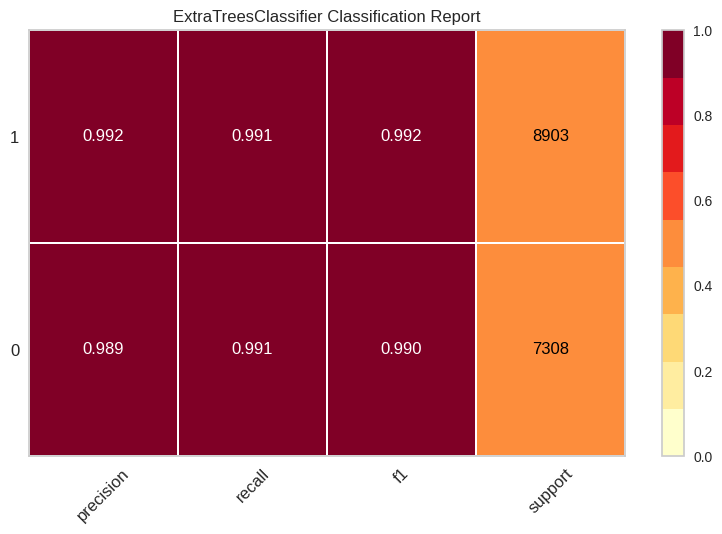

In [ ]:
# plot class report
plot_model(best, plot = 'class_report')

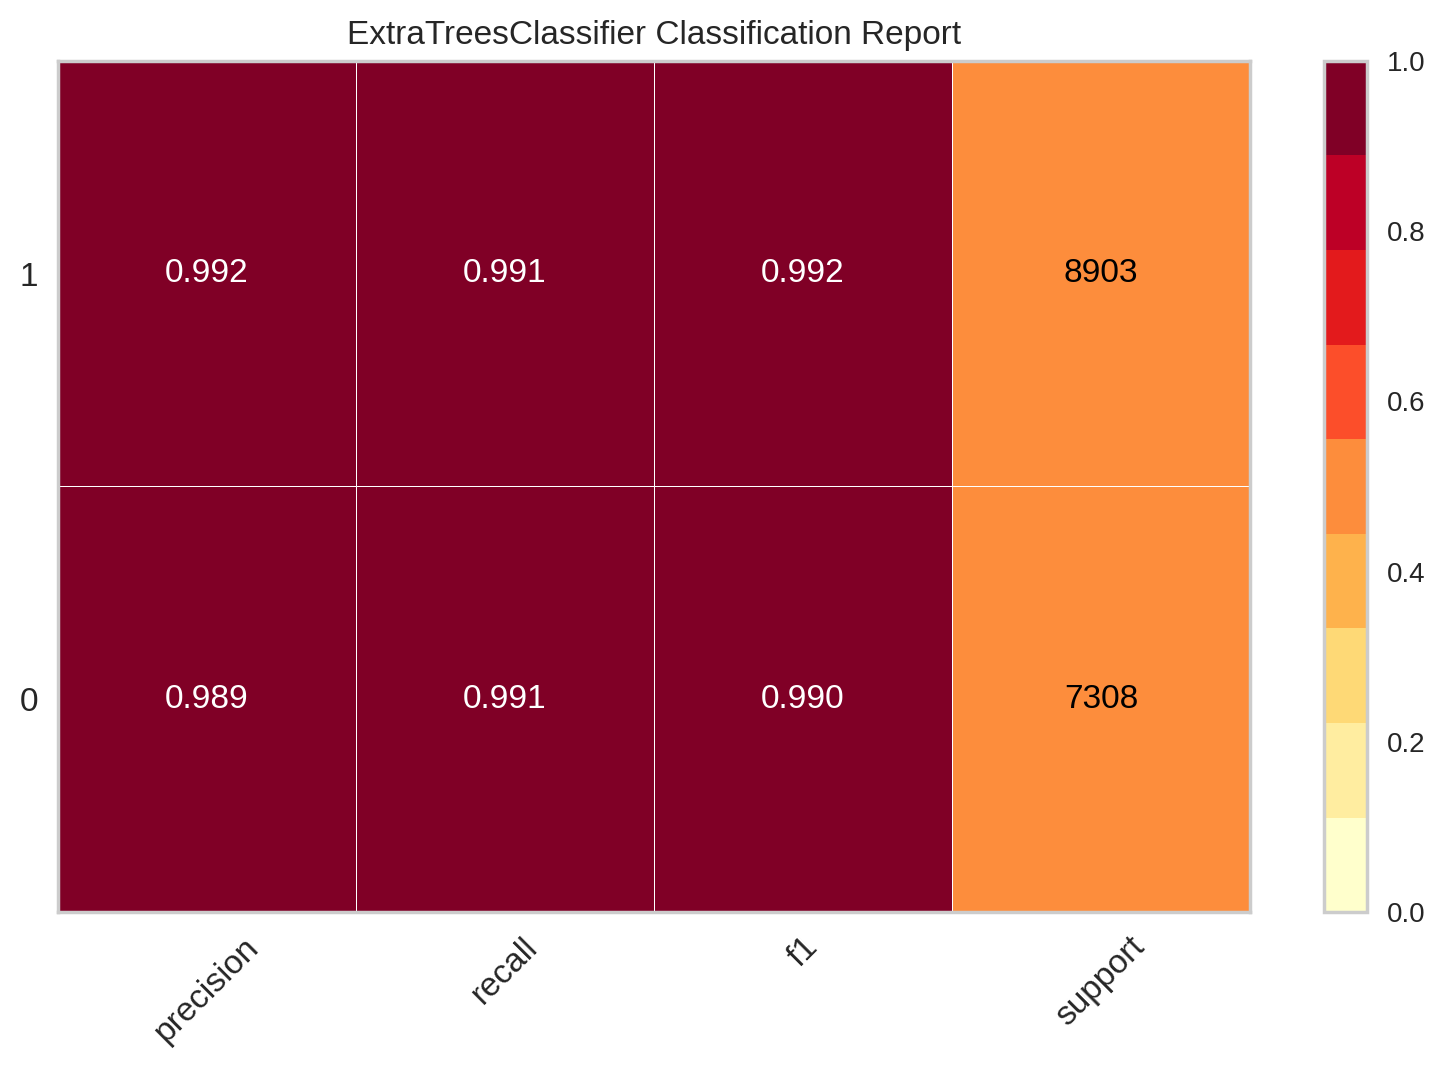

In [ ]:
# to control the scale of plot
plot_model(best, plot = 'class_report', scale = 2)

In [ ]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

In [ ]:
# help(plot_model)

In [ ]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9794,0.9984,0.9793,0.9831,0.9812,0.9584,0.9584
1,0.9778,0.9974,0.9774,0.9821,0.9797,0.9552,0.9552
2,0.9778,0.9968,0.9783,0.9812,0.9798,0.9552,0.9552
3,0.9791,0.9980,0.9798,0.9822,0.9810,0.9578,0.9578
4,0.9746,0.9976,0.9745,0.9792,0.9768,0.9488,0.9488
5,0.9728,0.9975,0.9721,0.9782,0.9751,0.9450,0.9451
6,0.9796,0.9982,0.9793,0.9836,0.9814,0.9589,0.9589
7,0.9810,0.9982,0.9807,0.9845,0.9826,0.9616,0.9616
8,0.9749,0.9972,0.9701,0.9839,0.9770,0.9493,0.9495


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

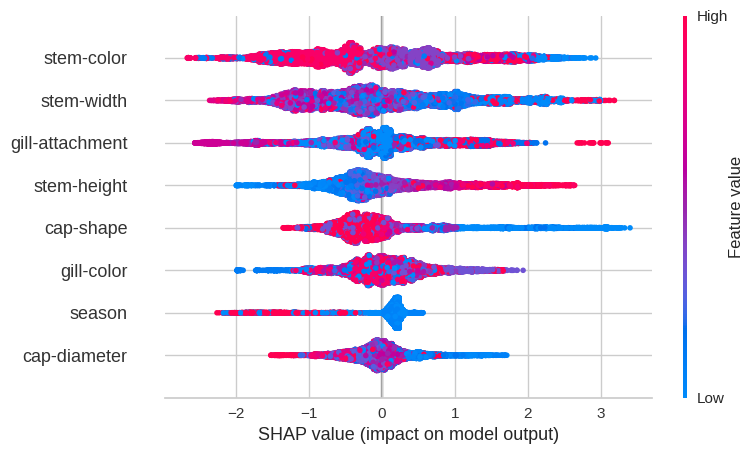

In [ ]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [ ]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

In [ ]:
# help(interpret_model)

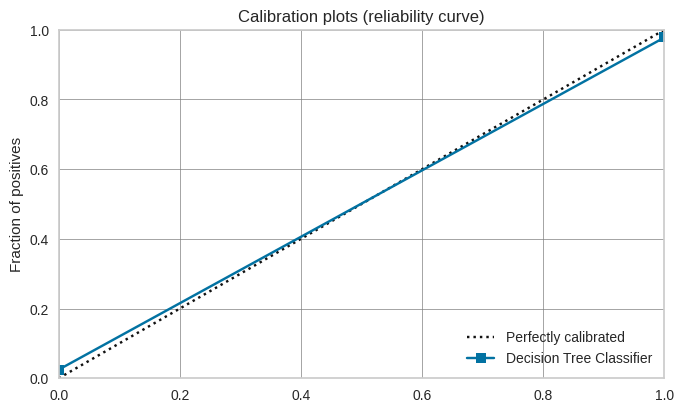

In [ ]:
# check calbiration of default dt
plot_model(dt, plot = 'calibration')

In [ ]:
# calibrate default dt
calibrated_dt = calibrate_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9863,0.9955,0.9880,0.9870,0.9875,0.9722,0.9722
1,0.9765,0.9948,0.9779,0.9793,0.9786,0.9525,0.9525
2,0.9802,0.9938,0.9851,0.9790,0.9820,0.9599,0.9600
3,0.9839,0.9941,0.9860,0.9846,0.9853,0.9674,0.9674
4,0.9823,0.9943,0.9836,0.9841,0.9839,0.9642,0.9642
5,0.9833,0.9948,0.9909,0.9791,0.9849,0.9663,0.9664
6,0.9812,0.9932,0.9827,0.9831,0.9829,0.9621,0.9621
7,0.9823,0.9945,0.9831,0.9846,0.9839,0.9642,0.9642
8,0.9799,0.9919,0.9807,0.9826,0.9817,0.9594,0.9594


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

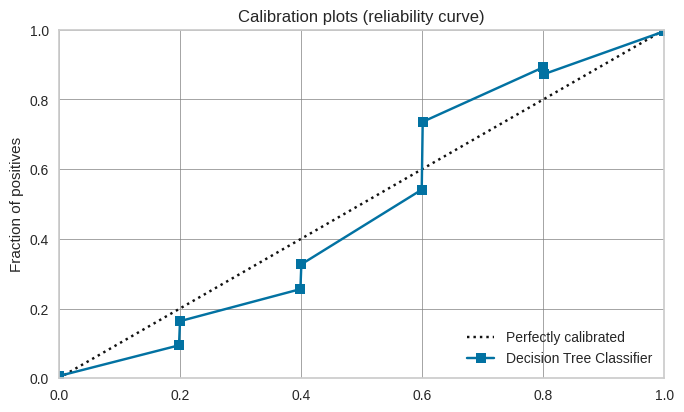

In [ ]:
# check calbiration of calibrated dt
plot_model(calibrated_dt, plot = 'calibration')

In [ ]:
# help(calibrate_model)

In [ ]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/76 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Custom Metric
Index,,,,,,,,,,
0,Logistic Regression,"(TransformerWrapper(exclude=None,\n ...",0.6360,0.6823,0.7133,0.6548,0.6828,0.2577,0.2590,NaN
1,K Neighbors Classifier,"(TransformerWrapper(exclude=None,\n ...",0.9893,0.9971,0.9921,0.9884,0.9902,0.9783,0.9783,NaN
2,Naive Bayes,"(TransformerWrapper(exclude=None,\n ...",0.6356,0.6875,0.7112,0.6549,0.6819,0.2570,0.2583,NaN
3,Decision Tree Classifier,"(TransformerWrapper(exclude=None,\n ...",0.9744,0.9742,0.9766,0.9768,0.9767,0.9483,0.9483,NaN
4,SVM - Linear Kernel,"(TransformerWrapper(exclude=None,\n ...",0.6361,0.6829,0.6382,0.6836,0.6558,0.2699,0.2740,NaN
...,...,...,...,...,...,...,...,...,...,...
70,Decision Tree Classifier,"(TransformerWrapper(exclude=None,\n ...",0.9746,0.9744,0.9772,0.9767,0.9769,0.9488,0.9488,NaN
71,Voting Classifier,"(TransformerWrapper(exclude=None,\n ...",0.9904,0.9993,0.9933,0.9892,0.9912,0.9805,0.9805,NaN
72,Stacking Classifier,"(TransformerWrapper(exclude=None,\n ...",0.9909,0.9993,0.9923,0.9912,0.9917,0.9817,0.9817,NaN


In [ ]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['cap-diameter', 'cap-shape',
                                             'gill-attachment', 'gill-color',
                                             'stem-height', 'stem-width',
                                             'stem-color', 'season'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean')))...
                                                                      verbose=0,
                                                                      warm_start=False))],
                                    final_estimator=LogisticRegression(C=1.0,
                                                                       class_weight=None,
                                                                       dual=False,
                                                                       fit_intercept=True,
                                                                       intercept_scaling=1,
                                                                       l1_ratio=None,
                                                                       max_iter=1000,
                                                                       multi_class='auto',
                                                                       n_jobs=None,
                                                                       penalty='l2',
                                                                       random_state=123,
                                                                       solver='lbfgs',
                                                                       tol=0.0001,
                                                                       verbose=0,
                                                                       warm_start=False),
                                    n_jobs=-1, passthrough=False,
                                    stack_method='auto', verbose=0)]],
         verbose=False)

In [ ]:
# help(get_leaderboard)

In [ ]:
automl()

StackingClassifier(cv=5,
                   estimators=[('Dummy Classifier',
                                DummyClassifier(constant=None, random_state=123,
                                                strategy='prior')),
                               ('K Neighbors Classifier',
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=-1, n_neighbors=5,
                                                     p=2, weights='uniform')),
                               ('Extra Trees Classifier',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alp...
                                                     random_state=123,
                                                     verbose=0,
                                                     warm_start=False))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9907,0.9993,0.9908,0.9924,0.9916,0.9813,0.9813


,Samples,Accuracy,Recall,Precision,F1,Kappa,MCC,Selection Rate
stem-color,,,,,,,,
0,48,1.0,0.0,0.0,0.0,NaN,0.0,0.0
1,621,0.988728,0.995595,0.989059,0.992316,0.971169,0.971243,0.73591
2,291,1.0,1.0,1.0,1.0,NaN,0.0,1.0
3,773,0.998706,1.0,0.996644,0.998319,0.997268,0.997272,0.385511
4,176,1.0,1.0,1.0,1.0,NaN,0.0,1.0
5,58,1.0,1.0,1.0,1.0,1.0,1.0,0.534483
6,4655,0.998711,0.99897,0.99897,0.99897,0.997248,0.997248,0.625779
7,542,0.99631,0.996678,0.996678,0.996678,0.992528,0.992528,0.555351
8,307,1.0,1.0,1.0,1.0,1.0,1.0,0.879479


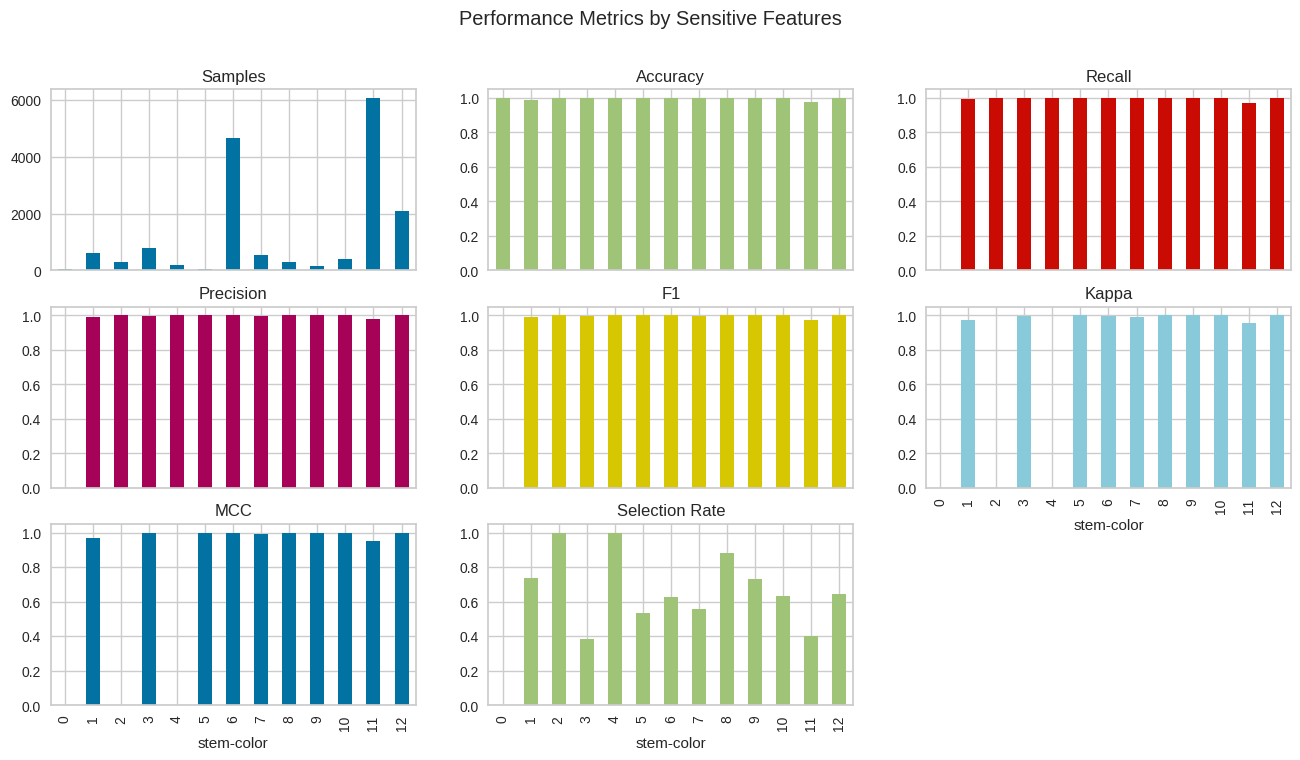

In [ ]:
# check fairness
check_fairness(best, sensitive_features = ['stem-color'])

In [ ]:
# dashboard function
dashboard(dt, display_format ='inline')

Note: model_output=='probability', so assuming that raw shap output of DecisionTreeClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# create gradio app
create_app(best)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://89dd9e5b97703dcab9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [ ]:
# !python my_first_api.py

In [ ]:
# check out the .py file created with this magic command
# %load my_first_api.py

In [ ]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [ ]:
# check out the DockerFile file created with this magic command
# %load DockerFile

In [ ]:
# check out the requirements file created with this magic command
# %load requirements.txt

In [ ]:
final_best = finalize_model(best)

In [ ]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['cap-diameter', 'cap-shape',
                                             'gill-attachment', 'gill-color',
                                             'stem-height', 'stem-width',
                                             'stem-color', 'season'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean')))...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=123, verbose=0,
                                      warm_start=False))],
         verbose=False)

In [ ]:
# transpiles learned function to java
print(convert_model(best, language = 'java'))

Buffered data was truncated after reaching the output size limit.

In [ ]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [ ]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

In [ ]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['cap-diameter', 'cap-shape',
                                              'gill-attachment', 'gill-color',
                                              'stem-height', 'stem-width',
                                              'stem-color', 'season'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean')))...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
   

In [ ]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['cap-diameter', 'cap-shape',
                                             'gill-attachment', 'gill-color',
                                             'stem-height', 'stem-width',
                                             'stem-color', 'season'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strateg...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=123, verbose=0,
                                      warm_start=False))],
         verbose=False)

In [ ]:
# save experiment
save_experiment('my_experiment')

In [ ]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=my_df)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Original data shape,"(54035, 9)"
4,Transformed data shape,"(54035, 9)"
5,Transformed train set shape,"(37824, 9)"
6,Transformed test set shape,"(16211, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple
